In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd 
import time
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.svm import SVR
import scipy
import RandomBinningFeatures
import matplotlib.pyplot as plt 
%matplotlib inline 

### Read the data

In [2]:
data = pd.read_csv('data.txt',sep='   ',header=None,prefix='X')
data.columns = ['Lever position','Ship speed','Gas Turbine shaft torque','Gas Turbine rate of revolutions','Gas Generator rate of revolutions', 
                'Starboard Propeller Torque','Port Propeller Torque','HP Turbine exit temperature','GT Compressor inlet air temperature',
                'GT Compressor outlet air temperature','HP Turbine exit pressure','GT Compressor inlet air pressure','GT Compressor outlet air pressure',
                'Gas Turbine exhaust gas pressure','Turbine Injecton Control','Fuel flow','GT Compressor decay state coefficient','GT Turbine decay state coefficient']

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [3]:
data.head()

,Lever position,Ship speed,Gas Turbine shaft torque,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,HP Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,Gas Turbine exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


We find that there is no NaN values in this dataset.

In [4]:
#without nan value
data.isnull().values.any()

False

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
Lever position                           11934 non-null float64
Ship speed                               11934 non-null float64
Gas Turbine shaft torque                 11934 non-null float64
Gas Turbine rate of revolutions          11934 non-null float64
Gas Generator rate of revolutions        11934 non-null float64
Starboard Propeller Torque               11934 non-null float64
Port Propeller Torque                    11934 non-null float64
HP Turbine exit temperature              11934 non-null float64
GT Compressor inlet air temperature      11934 non-null float64
GT Compressor outlet air temperature     11934 non-null float64
HP Turbine exit pressure                 11934 non-null float64
GT Compressor inlet air pressure         11934 non-null float64
GT Compressor outlet air pressure        11934 non-null float64
Gas Turbine exhaust gas pressure         11934 non-null flo

In [6]:
num_features = len(data.columns)#get the number of features 

In [7]:
unique_num_features = []
for i in range(num_features):
    unique_num_features.append(len(data[data.columns[i]].unique()))

In [8]:
print(np.argmax(unique_num_features))

4


In [9]:
label_num = np.argmax(unique_num_features)

To set the faeture with the largest number of unique values as the label in this regression task.

In [10]:
X = data.drop([data.columns[label_num]],axis=1)
y = data[data.columns[label_num]]

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 17 columns):
Lever position                           11934 non-null float64
Ship speed                               11934 non-null float64
Gas Turbine shaft torque                 11934 non-null float64
Gas Turbine rate of revolutions          11934 non-null float64
Starboard Propeller Torque               11934 non-null float64
Port Propeller Torque                    11934 non-null float64
HP Turbine exit temperature              11934 non-null float64
GT Compressor inlet air temperature      11934 non-null float64
GT Compressor outlet air temperature     11934 non-null float64
HP Turbine exit pressure                 11934 non-null float64
GT Compressor inlet air pressure         11934 non-null float64
GT Compressor outlet air pressure        11934 non-null float64
Gas Turbine exhaust gas pressure         11934 non-null float64
Turbine Injecton Control                 11934 non-null flo

In [12]:
y.head()

0    6677.380
1    6828.469
2    7111.811
3    7792.630
4    8494.777
Name: Gas Generator rate of revolutions, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
(X_train.shape,y_train.shape)

((7995, 17), (7995,))

In [15]:
(X_test.shape,y_test.shape)

((3939, 17), (3939,))

### Random Fourier Features 

In [16]:
start_time = time.time()
rbf_feature = RBFSampler(gamma=0.0001, random_state=42, n_components=500)
rbf_feature.fit(X_train)
X_features_train = rbf_feature.transform(X_train)
X_features_test = rbf_feature.transform(X_test)
clf = Ridge(alpha=0.01, solver='lsqr',random_state=42)
clf.fit(X_features_train, y_train) 
y_pred = clf.predict(X_features_test)
print("--- %s seconds ---" % (time.time() - start_time))
score = np.linalg.norm((y_test-y_pred))/np.linalg.norm(y_test)*100
print("error:   %0.3f" % score+"%")

--- 0.6970779895782471 seconds ---
error:   0.225%


### Random Binning Features

In [17]:
err = RandomBinningFeatures.RandomBinning.evaluate_random_binning(X_train, y_train, X_test, y_test, 30, 'regression')

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:311: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "


--- 1.3524317741394043 seconds ---
C = 141915; error_test = 7.58%


### SVM

In [18]:
start_time = time.time()
svr_ = SVR(kernel='rbf', gamma=0.0001)
svr_.fit(X_train,y_train)
y_pred = svr_.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
score = np.linalg.norm((y_test-y_pred))/np.linalg.norm(y_test)*100
print("error:   %0.3f" % score+"%")

--- 11.381791830062866 seconds ---
error:   9.456%


### Plotting 

In [46]:
#use random fourier feature
def plot_error_and_time(D,gamma=0.01,alpha=10.):
    times = []
    errs = [] 
    for d in D:
        start_time = time.time()
        rbfs = RBFSampler(gamma=gamma,n_components=d,random_state=42)
        Z = rbfs.fit(X_train)
        train_features = Z.transform(X_train)
        test_features = Z.transform(X_test)

        clf = Ridge(alpha=alpha, solver='lsqr',random_state=42)
        clf.fit(train_features, y_train) 
        y_pred = clf.predict(test_features)

        times.append(time.time() - start_time)
        errs.append(np.linalg.norm((y_test-y_pred))/np.linalg.norm(y_test)*100) 
        
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.plot(D, times)
    plt.xlabel("D")
    plt.ylabel("training and testing time(sec)")
    plt.subplot(122)
    plt.plot(D,errs)
    plt.xlabel("D")
    plt.ylabel("testing error rate(%)")

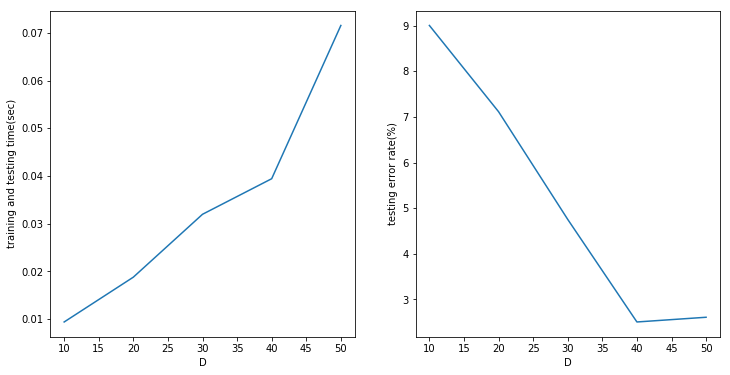

In [47]:
plot_error_and_time([10,20,30,40,50],gamma=0.0001, alpha=0.01)

In [58]:
#use random binning feature
def plot_error_and_time(D,gamma=0.01,alpha=10.):
    times = []
    errs = [] 
    for d in D:
        start_time = time.time()
        rbfs = RandomBinningFeatures.RandomBinning.evaluate_random_binning(X_train, y_train, X_test, y_test, d, 'regression')
        times.append(time.time() - start_time)
        errs.append(rbfs) 
        
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.plot(D, times)
    plt.xlabel("P")
    plt.ylabel("training and testing time(sec)")
    plt.subplot(122)
    plt.plot(D,errs)
    plt.xlabel("P")
    plt.ylabel("testing error rate(%)")

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:311: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "


--- 0.4893910884857178 seconds ---
C = 57147; error_test = 9.05%
--- 0.8732907772064209 seconds ---
C = 93148; error_test = 8.56%
--- 1.3105692863464355 seconds ---
C = 150477; error_test = 8.93%
--- 1.7865700721740723 seconds ---
C = 186295; error_test = 8.13%
--- 2.246891975402832 seconds ---
C = 242091; error_test = 8.29%


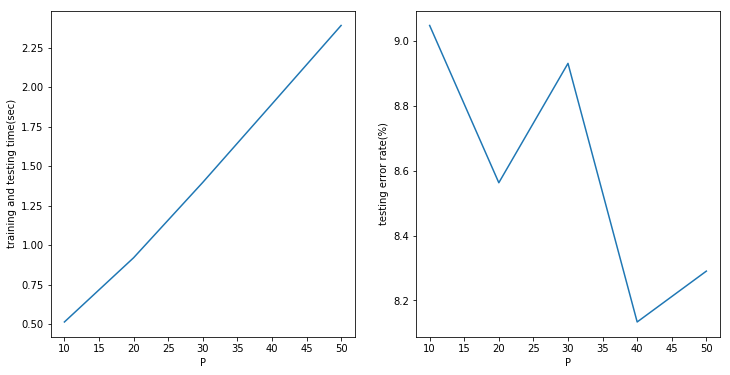

In [60]:
plot_error_and_time([10,20,30,40,50],gamma=0.0001, alpha=0.01)